# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

# Data Collection and Preprocessing

In [2]:
# Load the data
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# check the number of rows and columns
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
for col in ['Fuel_Type', 'Seller_Type', 'Transmission']:
    print(f'\n {col} Distribution:')
    print(df[col].value_counts())


 Fuel_Type Distribution:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

 Seller_Type Distribution:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

 Transmission Distribution:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


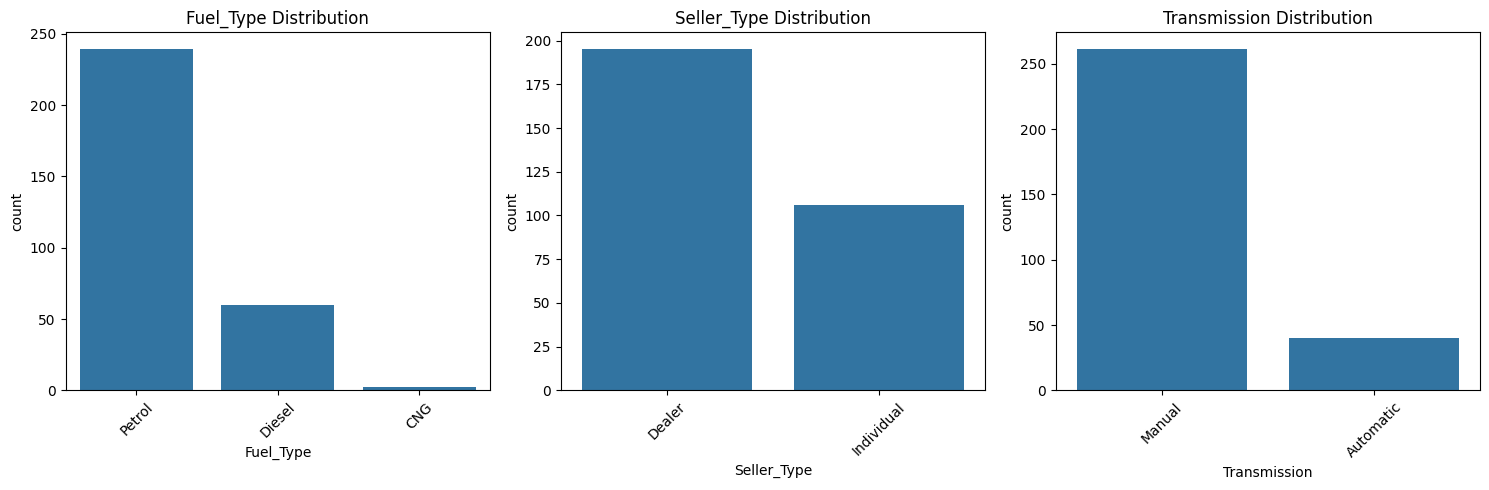

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i,col in enumerate(['Fuel_Type', 'Seller_Type', 'Transmission']):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

petrol --> 0
Diesel --> 1
CNG --> 2
_________________________
Dealer --> 0
individual --> 1
_________________________
manual --> 0
automatic --> 1

## Encoding the categorical data

In [10]:
# Encoding Fuel_Type column
df.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace= True)


In [11]:
# Encoding Seller_Type column
df.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)


In [12]:
# Encoding Transmission column
df.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
print('fuel type')
print(df['Fuel_Type'].unique())

print('seller type')
print(df['Seller_Type'].unique())

print('Transmission')
print(df['Transmission'].unique())

fuel type
[0 1 2]
seller type
[0 1]
Transmission
[0 1]


# Splitting the data and target

In [18]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1) # Removing Car_Name and Selling_Price columns
y = df['Selling_Price']



In [16]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [19]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting the data and target

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

## Linear Regression

In [29]:
# Loadint the linear regression model
lin_reg_model = LinearRegression()

In [30]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### Model evaluation

In [31]:
# Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [32]:
# R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square error : ", error_score)

R square error :  0.8761249192923499


Visualize actual Vs predicted prices

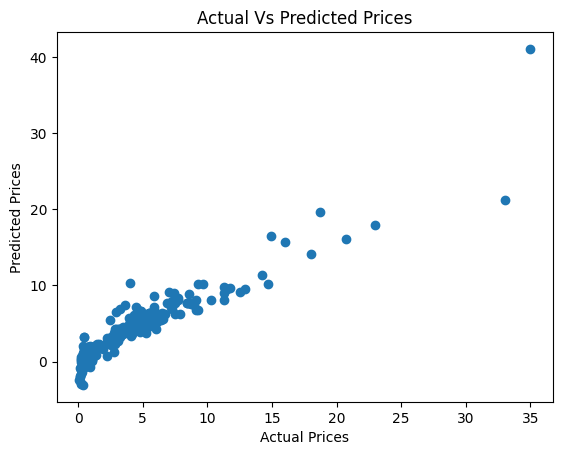

In [33]:
plt.scatter(Y_train, training_data_prediction)
plt.title('Actual Vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel("Predicted Prices")
plt.show()

In [34]:
# Prediction on testing data
test_data_prediction = lin_reg_model.predict(X_test)
# R square error
error_test_score = metrics.r2_score(Y_test, test_data_prediction)
print('R square error : ', error_test_score)

R square error :  0.8773175030338084


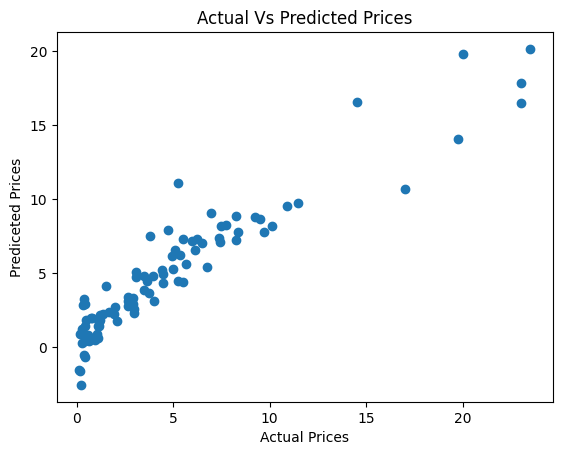

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.title('Actual Vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Prediceted Prices')
plt.show()